Xây dựng mạng ANN phân lớp fashion. Khai báo các gói numpy, mnist, keras
https://victorzhou.com/blog/keras-neural-network-tutorial/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
#from keras.datasets import mnist
from keras.datasets import fashion_mnist


Lấy dữ liệu từ mnist. Có 2 tập train và test


In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Có 60000 ảnh train và 10000 ảnh để test

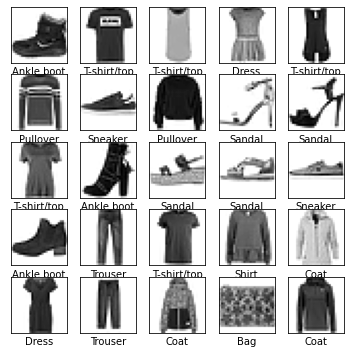

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

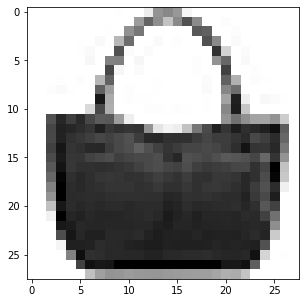

In [8]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[100], cmap=plt.cm.binary)
plt.show()


In [9]:
# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))


Mạng có 1 lớp vào 784 nút, 2 lớp ẩn mỗi lớp 64 nút, 1 lớp ra 10 nút. Các hàm kích hoạt là relu và softmax

In [10]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

Huấn luyện mạng 

In [13]:
history=model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=100,
  batch_size=32,
)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5100 - accuracy: 0.8209
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3799 - accuracy: 0.8623
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3437 - accuracy: 0.8741
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step 

KeyboardInterrupt: 

In [53]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


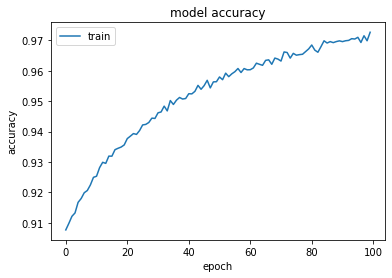

In [29]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

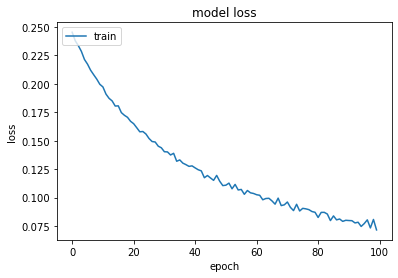

In [30]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.8093 - accuracy: 0.8809


[0.8093073964118958, 0.8809000253677368]

In [32]:
import keras
model.save('model.h5')

In [33]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:10])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:10]) # [7, 2, 1, 0, 4]

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


Thử lấy model đã lưu trong model.h5 - không phải đào tạo lại

In [34]:
predictions

array([[7.7265480e-23, 1.1805246e-29, 1.5437944e-28, 6.1370164e-30,
        4.6135849e-26, 2.2110415e-17, 4.5169536e-14, 1.9104606e-08,
        3.7162239e-26, 1.0000000e+00],
       [3.0306285e-18, 1.0173731e-20, 9.9948442e-01, 2.7990963e-29,
        5.1553093e-04, 8.4283240e-24, 2.7242425e-12, 1.2741524e-32,
        5.2515505e-29, 3.1714981e-31],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2959765e-01, 4.5169786e-18, 4.7546775e-09, 2.1264861e-11,
        1.9656973e-13, 8.0948974e-23, 8.7040234e-01, 5.1448265e-36,
        7.3846699e-16, 2.9045557e-26],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0282007e-35, 0.00

In [35]:
# Load the model's saved weights.
#model1= model.load_weights('model.h5')

model1= keras.models.load_model('model.h5')


In [37]:
#@tf.autograph.experimental.do_not_convert
# Predict on the first 5 test images.
predictions = model1.predict(test_images[:50])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:50]) # [7, 2, 1, 0, 4]

[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0 2 5 7 5 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 0 1 6 7 6 7 2 1 2 6]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2]
